In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TOPIC AND SENTIMENT INTENSITY - DATA COMPOSITION 4 (Fixed Set Test).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,Class
Month,,,,,,,,,,,,,,
2008-01-01,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,Train
2008-01-02,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,Train
2008-01-03,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,Train
2008-01-04,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,Train
2008-01-05,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,Train


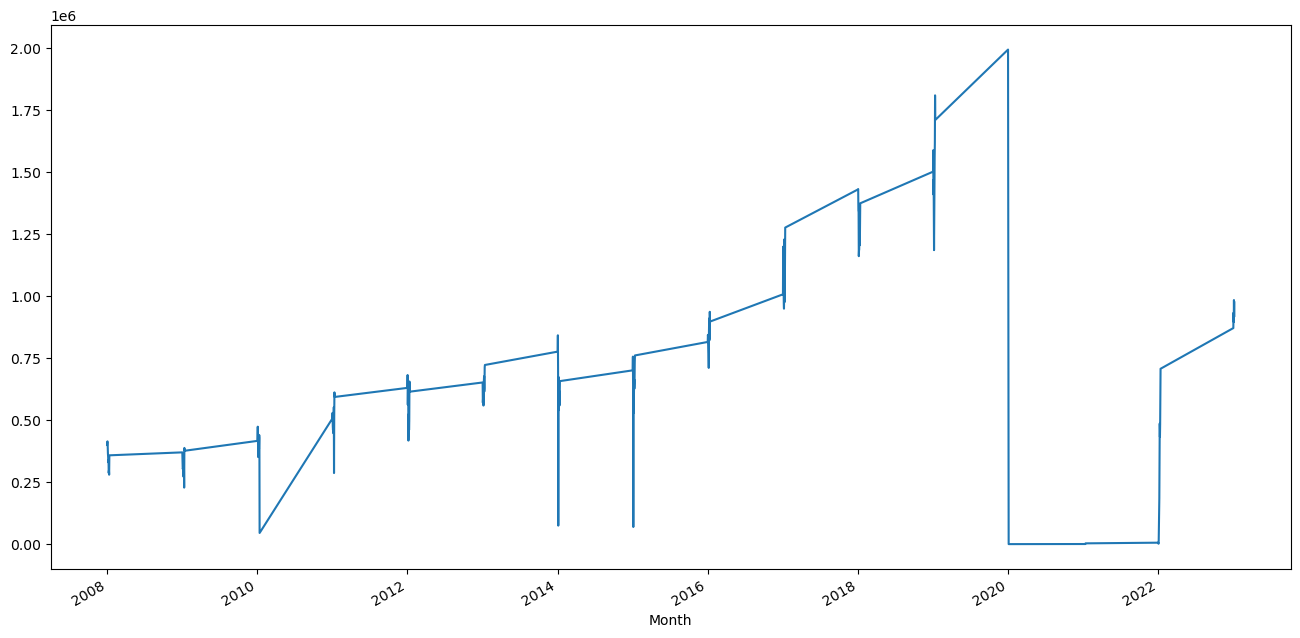

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  NegativityQDAP  PositivityQDAP   TOPIC 1  \
Month                                                                   
2008-01-01           399556        0.181818        0.090909  0.008715   
2008-01-02           411032        0.000000        0.090909  0.009085   
2008-01-03           414332        0.142857        0.000000  0.008164   
2008-01-04           395900        0.214286        0.071429  0.007528   
2008-01-05           366387        0.000000        0.100000  0.008862   
...                     ...             ...             ...       ...   
2023-01-02           932969        0.000000        0.181818  0.014135   
2023-01-03           895425        0.000000        0.142857  0.007677   
2023-01-04           984146        0.000000        0.222222  0.014135   
2023-01-05           916257        0.000000        0.125000  0.014135   
2023-01-06           975010        0.000000        0.111111  0.012180   

             TOPIC 2   TOPIC 3   TOPIC 4   TOPIC 5

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5062.559, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5058.682, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5059.447, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5059.222, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5056.726, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5057.622, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5057.310, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5058.795, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5060.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5060.497, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5062.493, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.087 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/01/2021'].dropna()
test = df1['Tourist Arrival']['01/04/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/01/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/04/2019':].dropna()

In [14]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(0,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54664D+01    |proj g|=  3.87776D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      0      1      0     0     0   3.878D-07   1.547D+01
  F =   15.466399825488141     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Tourist Arrival   No. Observations:                  157
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2428.225
Date:                Wed, 23 Aug 2023   AIC                           4882.450
Time:                        20:25:05   BIC                           4922.014
Sample:                             0   HQIC                          4898.520
                                - 157                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
NegativityQDAP  9.461e+04   3.16e+07      0.003      0.998   -6.19e+07    6.21e+07
PositivityQDAP   2.03e+05   2.71e+07      0.008      0.994   -5.28e+07    5.32e+07
TOPIC 1        -7.882e+04   3.47e+07     -0.002      0.998    -6.8e+07    6.79e+07
TOPIC 2        -2.204e+05    9.5e+06     -0.023      0.981   -1.88e+07    1.84e+07
TOPIC 3         2.955e+04   1.43e+07      0.002      0.998   -2.79e+07     2.8e+07
TOPIC 4        -7.257e+04   1.26e+07     -0.006      0.995   -2.47e+07    2.46e+07
TOPIC 5         5.165e+04   9.51e+06      0.005      0.996   -1.86e+07    1.87e+07
TOPIC 6        -5.815e+04    4.8e+07     -0.001      0.999   -9.41e+07     9.4e+07
TOPIC 7        -2.261e+04   9.62e+06     -0.002      0.998   -1.89e+07    1.88e+07
TOPIC 8        -8806.7701   8.82e+06     -0.001      0.999   -1.73e+07    1.73e+07
TOPIC 9        -1.534e+05   7.35e+06     -0.021      0.983   -1.46e+07    1.43e+07
TOPIC 10       -3.844e+04   2.03e+07     -0.002      0.998   -3.98e+07    3.98e+07
sigma2          6.402e+12   1.04e+12      6.184      0.000    4.37e+12    8.43e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1159.64
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               7.04   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [17]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 612835.6248230616


In [18]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 532349.7110942325


In [19]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 8.069324149636028e+20


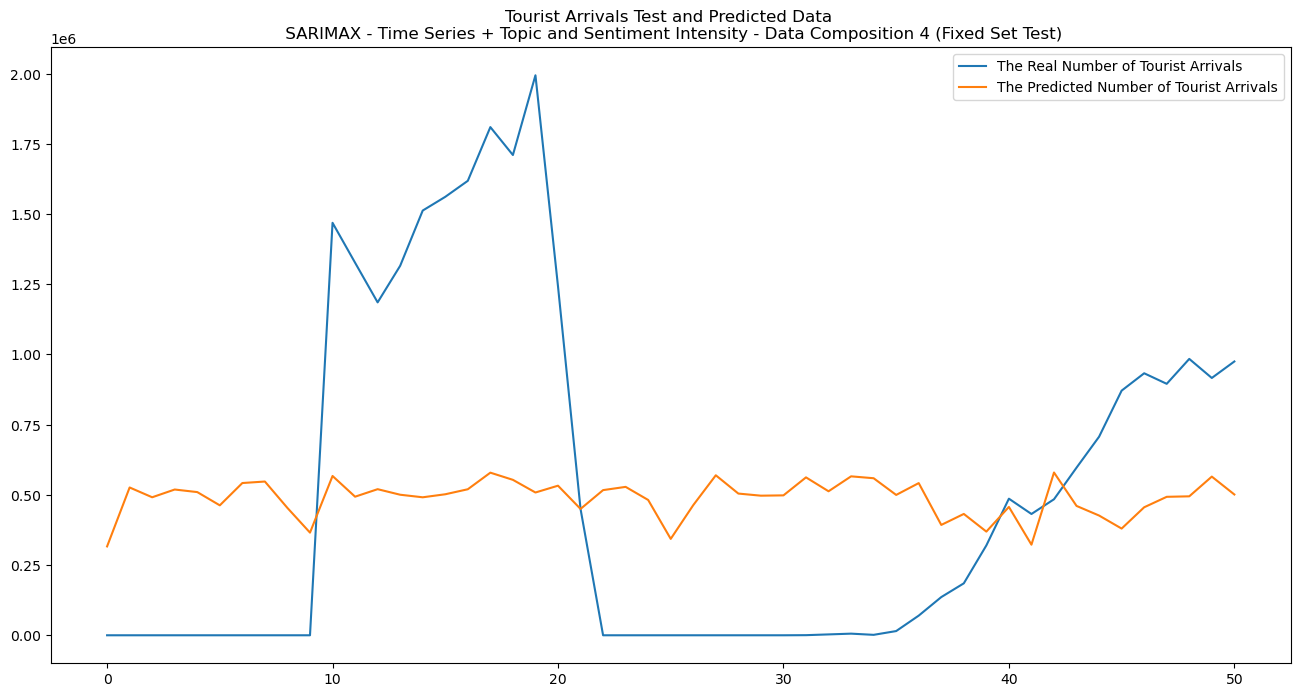

In [20]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Topic and Sentiment Intensity - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()